In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
rideshares = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\HVFHV_Compressed\Combined\full_compressed_HVFHV_2019_2020')

In [4]:
ridestoairport = rideshares.loc[(rideshares['DOLocationID']==1) | (rideshares['DOLocationID']==132) | (rideshares['DOLocationID']==138),:]

In [11]:
ridestoairport.columns

Index(['PULocationID', 'DOLocationID', 'Year', 'Month', 'Day', 'Hour',
       'trip_miles_sum', 'congestion_surcharge_sum', 'tips_sum',
       'driver_pay_sum', 'trips'],
      dtype='object')

In [17]:
ridestoairport20192020 = pd.DataFrame(ridestoairport.groupby(['Year', 'Month'])['trips'].sum())
ridestoairport20192020

trips
Year Month         
2019 2       770373
     3       935486
     4       888475
     5      1012771
     6       927666
     7       905385
     8       943504
     9       909085
     10      963269
     11      942202
     12     1014155
2020 1       834766
     2       842929
     3       476243
     4        38352
     5        59258
     6       106725
     7       144108
     8       169761
     9       189143
     10      224815
     11      231359
     12      274284
2021 1            6

In [18]:
rideshares = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\HVFHV_Compressed\Combined\full_compressed_HVFHV_2021')
ridestoairport = rideshares.loc[(rideshares['DOLocationID']==1) | (rideshares['DOLocationID']==132) | (rideshares['DOLocationID']==138),:]
ridestoairport2021 = pd.DataFrame(ridestoairport.groupby(['Year', 'Month'])['trips'].sum())

In [19]:
rideshares = pd.read_parquet(r'C:\Users\EvanSpiller\Documents\DS BootCamp\Capstone\data\HVFHV_Compressed\Combined\full_compressed_HVFHV_2022_2023')
ridestoairport = rideshares.loc[(rideshares['DOLocationID']==1) | (rideshares['DOLocationID']==132) | (rideshares['DOLocationID']==138),:]
ridestoairport20222023 = pd.DataFrame(ridestoairport.groupby(['Year', 'Month'])['trips'].sum())

In [22]:
ridestoairportbymonthfull = pd.concat([ridestoairport20192020, ridestoairport2021, ridestoairport20222023], axis=0)


In [32]:
ridestoairportbymonthfull = pd.DataFrame(ridestoairportbymonthfull.groupby(['Year','Month'])['trips'].sum())
ridestoairportbymonthfull = ridestoairportbymonthfull.reset_index()

In [33]:
ridestoairportbymonthfull

,Year,Month,trips,year-month
0,2019,2,770373,2021
1,2019,3,935486,2022
2,2019,4,888475,2023
3,2019,5,1012771,2024
4,2019,6,927666,2025
5,2019,7,905385,2026
6,2019,8,943504,2027
7,2019,9,909085,2028
8,2019,10,963269,2029
9,2019,11,942202,2030


In [38]:
ridestoairportbymonthfull['year-month'] = pd.to_datetime(ridestoairportbymonthfull['Year'].astype(str) + '-' + ridestoairportbymonthfull['Month'].astype(str).str.zfill(2))


In [41]:
ridestoairportbymonthfull = ridestoairportbymonthfull.drop(51)

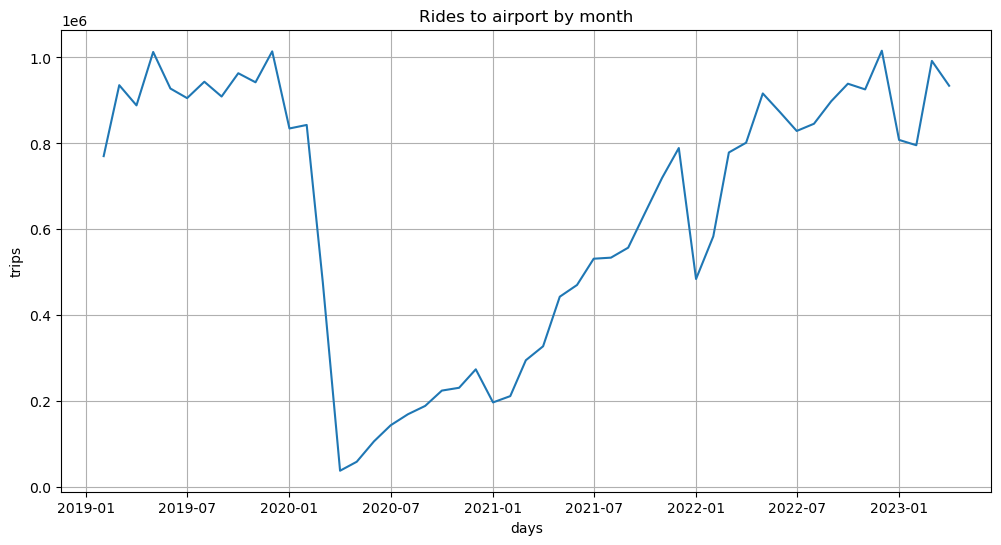

In [43]:
Months = ridestoairportbymonthfull['year-month']
Trips = ridestoairportbymonthfull['trips']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(Months, Trips)

ax.set(xlabel='days', ylabel='trips',
       title='Rides to airport by month')
ax.grid()
plt.show()